In this notebook, we are going to plot every model evaluation (MSE) with y and x being its amount of layers and neurons 

In [25]:
#importing every model (file that ends with .h5) in the folder
import os
import matplotlib.pyplot as plt
import numpy as np
#the path of the files will be the subfolder of the current folder named "model_different_amt"
path_model_diff = os.path.join(os.getcwd(), "model_different_amt")
files_diff = os.listdir(path_model_diff)

path_model_equal = os.path.join(os.getcwd(), "model_equal_amt")
files_equal = os.listdir(path_model_equal)

list_models_diff = []
list_models_equal = []

for file in files_equal:
    if file.endswith(".h5"):
        list_models_equal.append(os.path.join(path_model_equal, file))

for file in files_diff:
    #checking if the file ends with .h5
    if file.endswith(".h5"):
        #appeding the path to the model to the list
        list_models_diff.append(os.path.join(path_model_diff, file))

In [26]:
#print(list_models_diff)

In [27]:
#print(list_models_equal)

In [28]:
#loading the models
from keras.models import load_model
models_diff = []
models_equal = []

for model in list_models_equal:
    print(model)
    models_equal.append(load_model(model))

for model in list_models_diff:
    print(model)
    models_diff.append(load_model(model))

c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_17_225_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_18_107_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_18_30_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_1_237_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_5_120_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_6_48_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_7_190_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_8_69_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_equal_amt\model_9_162_8751.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_different_amt\model_10_84_5922.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_different_amt\model_11_229_11603.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_different_amt\model_11_248_4373.h5
c:\Users\lucca\Documents\UFSC\FETRANS\model_different_amt\model_14_233_8683.h5
c:\Users\lucca\Doc

In [29]:
#loading the test data
import pandas as pd
test = pd.read_csv("teste.csv")

target = test["heat_flux"]
dados = test[['conductivity','area','dt','dx','heat_transfer']]


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados = scaler.fit_transform(dados)
target = target.values.reshape(-1,1)
target = scaler.fit_transform(target)


In [31]:
#Now we are going to evaluate every model in the list for the test data
evals_diff = []
evals_equal = []

for model in models_diff:
    mse = model.evaluate(dados,target)
    evals_diff.append(mse)

for model in models_equal:
    mse = model.evaluate(dados,target)
    evals_equal.append(mse)

277/277 [==============================] - 1s 2ms/step - loss: 0.0074


In [32]:
#we are going to make a dictionary in which each index has a mse,amount of layers and neurons
dict_diff = {}
for i in range(len(evals_diff)):
    dict_diff[i] = [evals_diff[i],len(models_diff[i].layers)-1,models_diff[i].layers[0].get_config()['units']]

dict_equal = {}
for i in range(len(evals_equal)):
    dict_equal[i] = [evals_equal[i],len(models_equal[i].layers)-1,models_equal[i].layers[0].get_config()['units']]

[0.03259935975074768, 10, 84]
[0.01440330408513546, 11, 229]
[0.0622037798166275, 11, 248]
[0.011798327788710594, 14, 233]
[0.0014276059810072184, 14, 57]
[0.14562135934829712, 14, 70]
[0.016334958374500275, 16, 93]
[0.007927742786705494, 17, 154]
[0.01658466085791588, 5, 100]
[0.014188160188496113, 6, 167]
[0.004095281939953566, 8, 59]


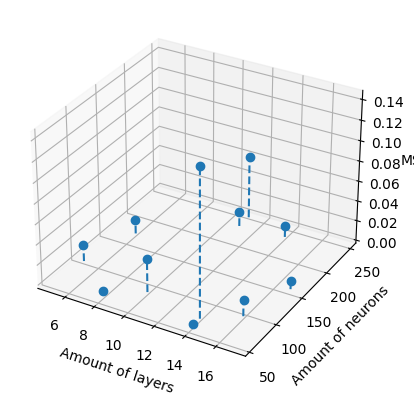

In [33]:
x = []
y = []
z = []

x = [dict_diff[i][1] for i in dict_diff]
y = [dict_diff[i][2] for i in dict_diff]
z = [dict_diff[i][0] for i in dict_diff]

for i in dict_diff:
    print(dict_diff[i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.stem(x,y,z,markerfmt='o',linefmt='--',basefmt='None')

ax.set_xlabel('Amount of layers')
ax.set_ylabel('Amount of neurons')
ax.set_zlabel('MSE')
plt.show()

[0.014954773709177971, 17, 225] 0
[0.007029292173683643, 18, 107] 1
[0.005301125347614288, 18, 30] 2
[0.017502479255199432, 1, 237] 3
[0.004627367947250605, 5, 120] 4
[0.003248903201892972, 6, 48] 5
[0.006776323076337576, 7, 190] 6
[0.0020811555441468954, 8, 69] 7
[0.007397155277431011, 9, 162] 8


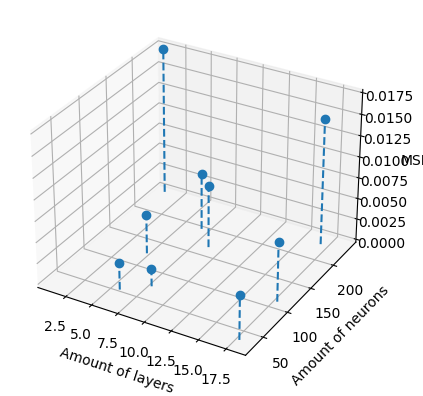

In [34]:
x = []
y = []
z = []

x = [dict_equal[i][1] for i in dict_equal]
y = [dict_equal[i][2] for i in dict_equal]
z = [dict_equal[i][0] for i in dict_equal]


for i in dict_equal:
    print(dict_equal[i],i)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.stem(x,y,z,markerfmt='o',linefmt='--',basefmt='None')

ax.set_xlabel('Amount of layers')
ax.set_ylabel('Amount of neurons')
ax.set_zlabel('MSE')
plt.show()


In [35]:
#Now we are going to create a list which will hold the prediction of every model of the first index of the data
predictions_equal = []
for model in models_equal:
    predictions_equal.append(model.predict(dados))

for i in range(len(predictions_equal)):
    predictions_equal[i] = scaler.inverse_transform(predictions_equal[i])

predictions_diff = []
for model in models_diff:
    predictions_diff.append(model.predict(dados))

for i in range(len(predictions_diff)):
    predictions_diff[i] = scaler.inverse_transform(predictions_diff[i])
    

277/277 [==============================] - 0s 1ms/step


In [36]:
values_equal = []
for i in range(len(predictions_equal)):
    values_equal.append(predictions_equal[i][0][0])

values_diff = []
for i in range(len(predictions_diff)):
    values_diff.append(predictions_diff[i][0][0])

In [37]:
#getting the heat_flux of the first value
first = test['heat_flux'][0]
print(first)


26717.349287460525


In [38]:
print(values_equal)

[26513.545, 23830.857, 25395.459, 27547.428, 25645.99, 26864.057, 25908.059, 26062.215, 25869.523]


In [39]:
print(values_diff)

[19918.79, 23218.037, 26874.041, 26632.242, 27249.879, 28048.03, 22998.182, 24529.732, 28166.885, 24338.412, 25093.855]


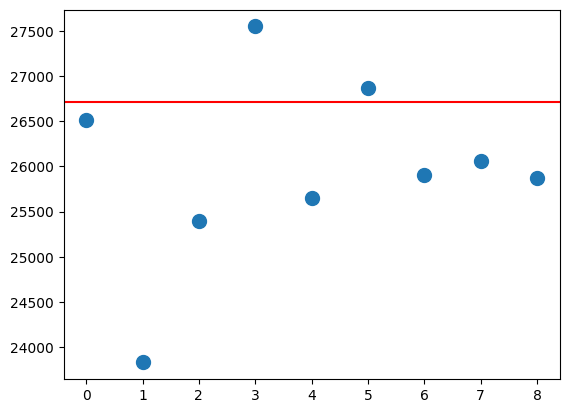

In [40]:
#making a scatter plot of the predictions
plt.scatter(range(len(predictions_equal)),values_equal,marker='o',s=100)
#Plotting a line of the real value
plt.axhline(y=first, color='r', linestyle='-')
#we are going to change the color of the points based on its distance from the real value
plt.show()


In [41]:
for i in dict_diff:
    print(dict_diff[i], i)

[0.03259935975074768, 10, 84] 0
[0.01440330408513546, 11, 229] 1
[0.0622037798166275, 11, 248] 2
[0.011798327788710594, 14, 233] 3
[0.0014276059810072184, 14, 57] 4
[0.14562135934829712, 14, 70] 5
[0.016334958374500275, 16, 93] 6
[0.007927742786705494, 17, 154] 7
[0.01658466085791588, 5, 100] 8
[0.014188160188496113, 6, 167] 9
[0.004095281939953566, 8, 59] 10


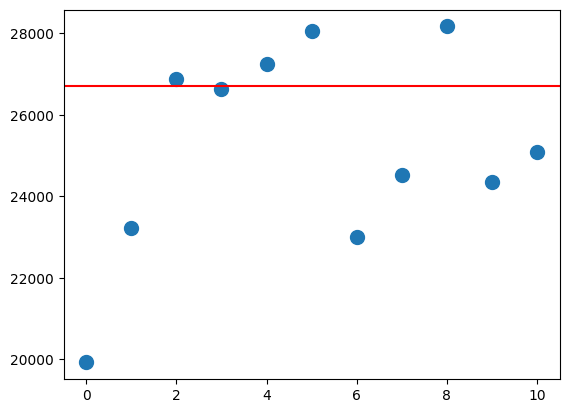

In [42]:
plt.scatter(range(len(predictions_diff)),values_diff,marker='o',s=100)

plt.axhline(y=first, color='r', linestyle='-')

plt.show()

In [43]:
#getting the lower mse from the eval_diff and its index
lower_mse_diff = min(evals_diff)
lower_mse_equal = min(evals_equal)

index_diff = evals_diff.index(lower_mse_diff)
index_same = evals_equal.index(lower_mse_equal)

model_diff = models_diff[index_diff]
model_diff.evaluate(dados,target)

model_equal = models_equal[index_same]
model_equal.evaluate(dados,target)


277/277 [==============================] - 0s 1ms/step - loss: 0.0021


0.0020811555441468954

In [44]:
pred_diff = model_diff.predict(dados)
pred_equal = model_equal.predict(dados)

#we have to inverse the scaling

pred_diff = scaler.inverse_transform(pred_diff)
pred_equal = scaler.inverse_transform(pred_equal)

target = scaler.inverse_transform(target)

#plotting the preds and the real value on a dataframe
df = pd.DataFrame({'pred_diff':pred_diff.reshape(-1),'pred_equal':pred_equal.reshape(-1),'real':target.reshape(-1)})



277/277 [==============================] - 0s 1ms/step


In [45]:
df

,pred_diff,pred_equal,real
0,27249.878906,26062.214844,26717.349287
1,14123.666016,13998.064453,13812.360561
2,4838.929199,4823.011230,5077.804082
3,3716.554199,3771.450684,3854.782065
4,1320.196655,1162.136108,1547.325194
...,...,...,...
8841,329.432007,-2.555296,83.886168
8842,1641.423218,1204.822632,1533.983412
8843,62417.492188,61768.921875,62126.999006
8844,6294.668457,5797.908691,5827.979855


In [49]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d

In [89]:
output_notebook()

p = figure( title="Heat Flux Prediction")
#plotting just the first 100 valeus 
p.line(df.index[:50], df['pred_diff'][:50], line_width=2, color='deeppink', legend_label='pred_diff')
p.line(df.index[:50], df['pred_equal'][:50], line_width=2, color='cyan', legend_label='pred_equal')
p.line(df.index[:50], df['real'][:50], line_width=2, color='black', legend_label='real')
p.legend.location = "top_left"
p.legend.click_policy="hide"
show(p)
#p.line(df.index, df['pred_diff'], line_width=2, color='red', legend_label='pred_diff')
#p.line(df.index, df['pred_equal'], line_width=2, color='blue', legend_label='pred_equal')
#p.line(df.index, df['real'], line_width=2, color='green', legend_label='real')
#p.legend.location = "top_left"
#p.legend.click_policy="hide"
#show(p)


Loading BokehJS ...